## 复制带随机指针的链表
---
给定一个链表，每个节点包含一个额外增加的随机指针，该指针可以指向链表中的任何节点或空节点。  
要求返回这个链表的[深拷贝](https://baike.baidu.com/item/%E6%B7%B1%E6%8B%B7%E8%B4%9D/22785317?fr=aladdin)。
我们用一个由`n`个节点组成的链表来表示输入/输出中的链表。每个节点用一个 `[val, random_index]` 表示：
- `val`一个表示 `Node.val` 的整数。
- `random_index`：随机指针指向的节点索引（范围从 `0`到 `n-1`）；如果不指向任何节点，则为  `null` 。

**示例1：**  
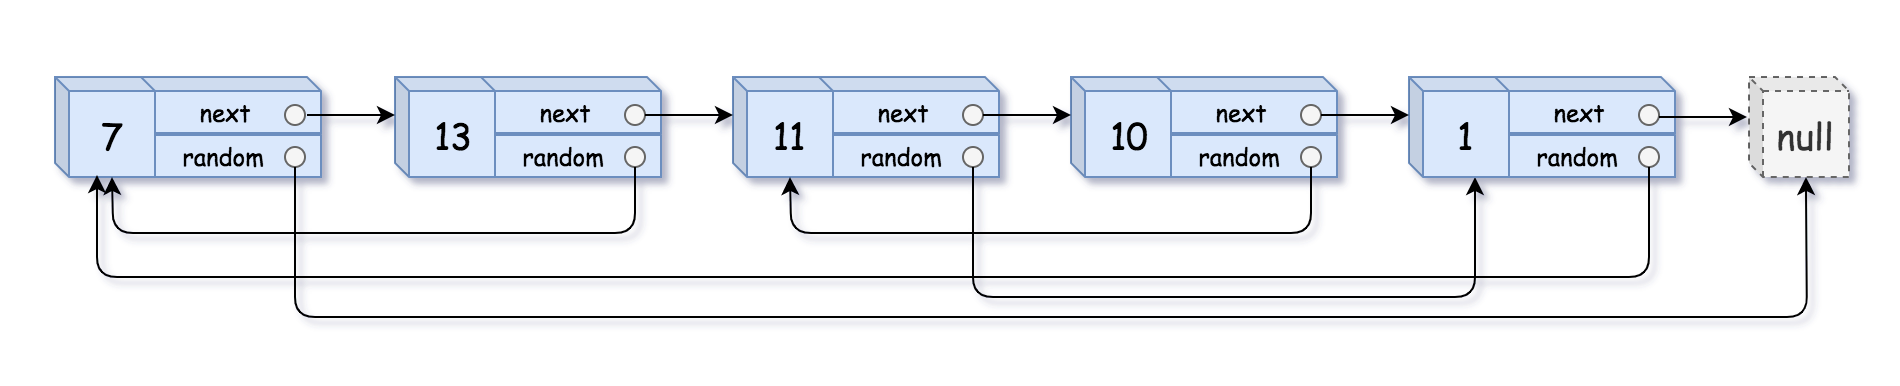

`输入:` head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
`输出：` [[7,null],[13,0],[11,4],[10,2],[1,0]]



**示例2：**
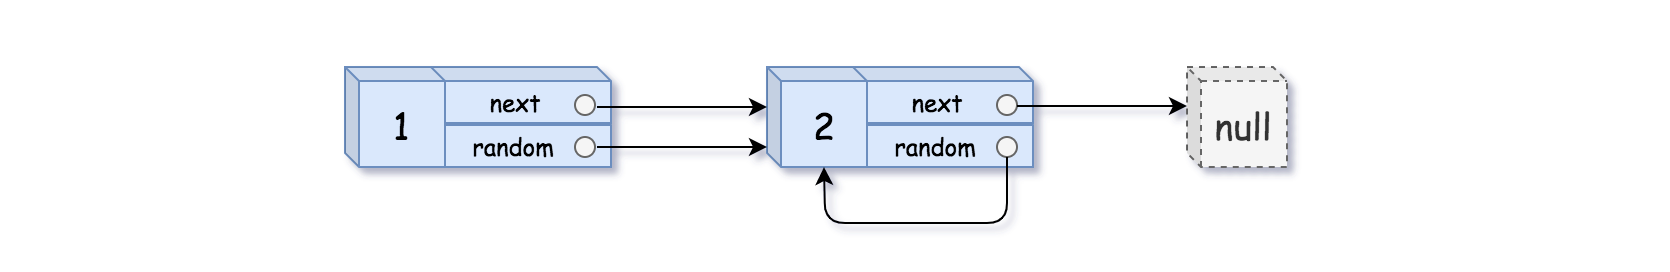

输入：head = [[1,1],[2,1]]
输出：[[1,1],[2,1]]



**示例 3：**
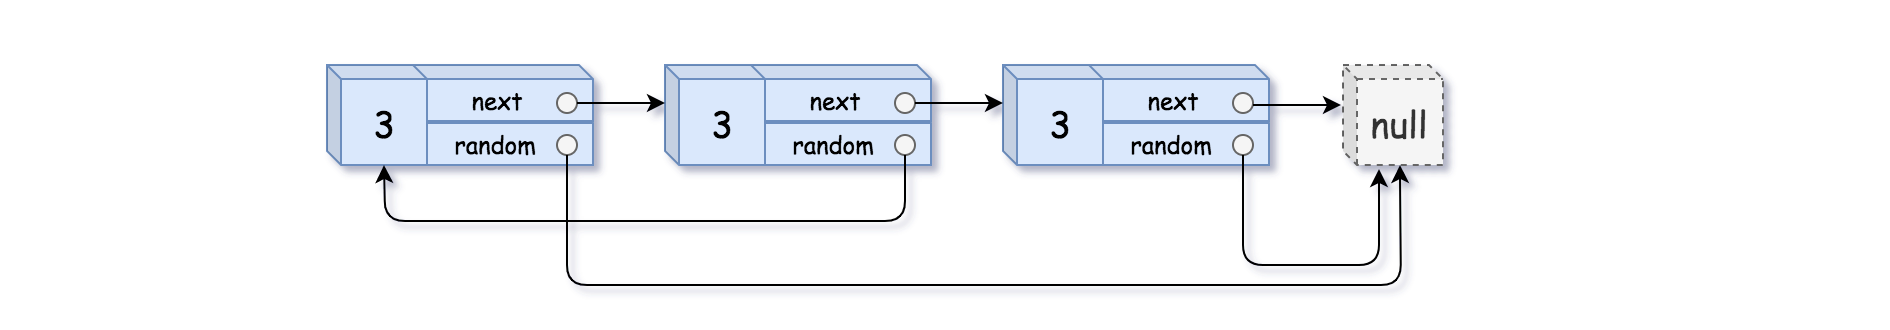

**示例 4：**
输入：head = []
输出：[]
解释：给定的链表为空（空指针），因此返回 null。

**提示：**

- -10000 <= Node.val <= 10000
- Node.random 为空（null）或指向链表中的节点。
- 节点数目不超过 1000 。

### 方法1：[回溯](https://leetcode-cn.com/problems/copy-list-with-random-pointer/solution/fu-zhi-dai-sui-ji-zhi-zhen-de-lian-biao-by-leetcod/)

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""
import copy
class Solution:
    def __init__(self):
        # Dictionary which holds old nodes as keys and new nodes as its values.
        self.visitedHash = {}

    def copyRandomList(self, head: 'Node') -> 'Node':
        if head is None:
            return head
        if head in self.visitedHash:
            return self.visitedHash[head]
        
        node = Node(head.val,None,None)
        self.visitedHash[head]=node
        node.next = self.copyRandomList(head.next)
        node.random=self.copyRandomList(head.random)
        return node

### 方法 2:$O(N)$ 空间的迭代

In [1]:
class Solution(object):
    def __init__(self):
        # Creating a visited dictionary to hold old node reference as "key" and new node reference as the "value"
        self.visited = {}

    def getClonedNode(self, node):
        # If node exists then
        if node:
            # Check if its in the visited dictionary          
            if node in self.visited:
                # If its in the visited dictionary then return the new node reference from the dictionary
                return self.visited[node]
            else:
                # Otherwise create a new node, save the reference in the visited dictionary and return it.
                self.visited[node] = Node(node.val, None, None)
                return self.visited[node]
        return None

    def copyRandomList(self, head):
        """
        :type head: Node
        :rtype: Node
        """

        if not head:
            return head

        old_node = head
        # Creating the new head node.       
        new_node = Node(old_node.val, None, None)
        self.visited[old_node] = new_node

        # Iterate on the linked list until all nodes are cloned.
        while old_node != None:

            # Get the clones of the nodes referenced by random and next pointers.
            new_node.random = self.getClonedNode(old_node.random)
            new_node.next = self.getClonedNode(old_node.next)

            # Move one step ahead in the linked list.
            old_node = old_node.next
            new_node = new_node.next

        return self.visited[head]


## 141.环形链表
---
给定一个链表，判断链表中是否有环。  
为了表示链表中的环，我们使用整数`pos`来表示链表尾连接到链表中的位置(索引从0开始)。如果`pos` 是-1，则在该链表中没有环。 
**示例1：**
```
输入：head = [3,2,0,-4], pos = 1
输出：true
解释：链表中有一个环，其尾部连接到第二个节点。
```
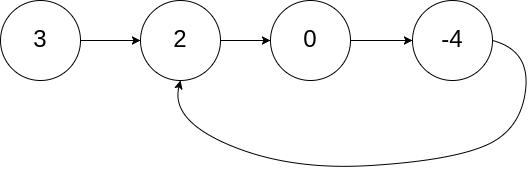



**示例2：**
```
输入：head = [1,2], pos = 0
输出：true
解释：链表中有一个环，其尾部连接到第一个节点。
```
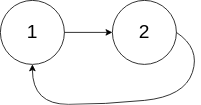


**示例3：**
```
输入：head = [1], pos = -1
输出：false
解释：链表中没有环。
```
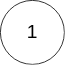

**进阶：**
你能用 O(1)（即，常量）内存解决此问题吗？

### 方法1 哈希表

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def __init__(self):
        self.visted={}
    def hasCycle(self, head: ListNode) -> bool:
        po = head
        while po not in self.visted:
            self.visted[po]=True
            if po==None:
                return False
            po=po.next
            
        
        return True

### 方法2： 双指针

算法

通过使用具有 不同速度 的快、慢两个指针遍历链表，空间复杂度可以被降低至 O(1)O(1)。慢指针每次移动一步，而快指针每次移动两步。

如果列表中不存在环，最终快指针将会最先到达尾部，此时我们可以返回 false。

现在考虑一个环形链表，把慢指针和快指针想象成两个在环形赛道上跑步的运动员（分别称之为慢跑者与快跑者）。而快跑者最终一定会追上慢跑者。这是为什么呢？考虑下面这种情况（记作情况 A）- 假如快跑者只落后慢跑者一步，在下一次迭代中，它们就会分别跑了一步或两步并相遇。

其他情况又会怎样呢？例如，我们没有考虑快跑者在慢跑者之后两步或三步的情况。但其实不难想到，因为在下一次或者下下次迭代后，又会变成上面提到的情况 A。


## 148.排序链表
---
在 O(n log n) 时间复杂度和常数级空间复杂度下，对链表进行排序。  
**示例1：**
```
输入: 4->2->1->3
输出: 1->2->3->4
```
**示例2：**
```
输入: -1->5->3->4->0
输出: -1->0->3->4->5
```

### 方法1：归并排序(递归法)

- 题目要求时间空间复杂度分别为`O(nlogn)`和`O(1)`，根据时间复杂度我们自然想到二分法，从而联想到归并排序。  
- 对数组做归并排序的空间复杂度为 `O(n)`，分别由新开辟数组`O(n)`和递归函数调用`O(logn)`组成，而根据链表特性：
    - 数组额外空间：链表可以通过修改引用来更改节点顺序，无需像数组一样开辟额外空间；
    - 递归额外空间：递归调用函数将带来`O(logn)`的空间复杂度，因此若希望达到`O(1)`空间复杂度，则不能使用递归。
- 通过递归实现链表归并排序，有以下两个环节:
 - **分割 cut 环节**： 找到当前链表中点，并从中点将链表断开（以便在下次递归 `cut` 时，链表片段拥有正确边界）；
      - 我们使用 `fast`,`slow` 快慢双指针法，奇数个节点找到中点，偶数个节点找到中心左边的节点。
      - 找到中点 `slow` 后，执行 `slow.next = None` 将链表切断。
      - 递归分割时，输入当前链表左端点 `head` 和中心节点 `slow` 的下一个节点 `tmp`(因为链表是从 `slow` 切断的)。
      - **cut 递归终止条件：** 当`head.next == None`时，说明只有一个节点了，直接返回此节点。
 - **合并merge环节**
     -  双指针法合并，建立辅助 ListNode `h` 作为头部。
     - 设置两指针 `left`, `right` 分别指向两链表头部，比较两指针处节点值大小，由小到大加入合并链表头部，指针交替前进，直至添加完两个链表。
     - 返回辅助ListNode `h` 作为头部的下个节点 `h.next`。
     - 时间复杂度 `O(l + r)`，`l`, `r` 分别代表两个链表长度。

 - 当题目输入的 head == None 时，直接返回None。

In [ ]:
class Solution:
    def sortList(self, head: ListNode) -> ListNode:
        if not head or not head.next: return head # termination.
        # cut the LinkedList at the mid index.
        slow, fast = head, head.next
        while fast and fast.next:
            fast, slow = fast.next.next, slow.next
        mid, slow.next = slow.next, None # save and cut.
        # recursive for cutting.
        left, right = self.sortList(head), self.sortList(mid)
        # merge `left` and `right` linked list and return it.
        h = res = ListNode(0)
        while left and right:
            if left.val < right.val: h.next, left = left, left.next
            else: h.next, right = right, right.next
            h = h.next
        h.next = left if left else right
        return res.next


In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def sortList(self, head: ListNode) -> ListNode:
        if not head or not head.next:
            return head

        self.slow = head
        self.fast = head.next
        while self.fast and self.fast.next:
            self.slow=self.slow.next
            self.fast=self.fast.next.next
        mid,self.slow.next=self.slow.next,None
        part1 =self.sortList(head)
        part2 = self.sortList(mid)
        lN=ListNode(0)
        q=lN
        while part1 and part2:
            if part1.val<part2.val:
                q.next,part1=part1,part1.next
            else: q.next,part2=part2,part2.next
            q=q.next
        q.next=part1 if part1 else part2
        return lN.next

### 方法2： 归并排序(从底至上直接合并)

- 对于非递归的归并排序，需要使用迭代的方式替换cut环节：
    - 我们知道，cut环节本质上是通过二分法得到链表最小节点单元，再通过多轮合并得到排序结果。
    - 每一轮合并merge操作针对的单元都有固定长度intv，例如：
        - 第一轮合并时intv = 1，即将整个链表切分为多个长度为1的单元，并按顺序两两排序合并，合并完成的已排序单元长度为2。
        - 第二轮合并时intv = 2，即将整个链表切分为多个长度为2的单元，并按顺序两两排序合并，合并完成已排序单元长度为4。
        - 以此类推，直到单元长度intv >= 链表长度，代表已经排序完成。
    - 根据以上推论，我们可以仅根据intv计算每个单元边界，并完成链表的每轮排序合并，例如:
        - 当intv = 1时，将链表第1和第2节点排序合并，第3和第4节点排序合并，……。
        - 当intv = 2时，将链表第1-2和第3-4节点排序合并，第5-6和第7-8节点排序合并，……。
        - 当intv = 4时，将链表第1-4和第5-8节点排序合并，第9-12和第13-16节点排序合并，……。
- 此方法时间复杂度O(nlogn)O(nlogn)，空间复杂度O(1)O(1)。



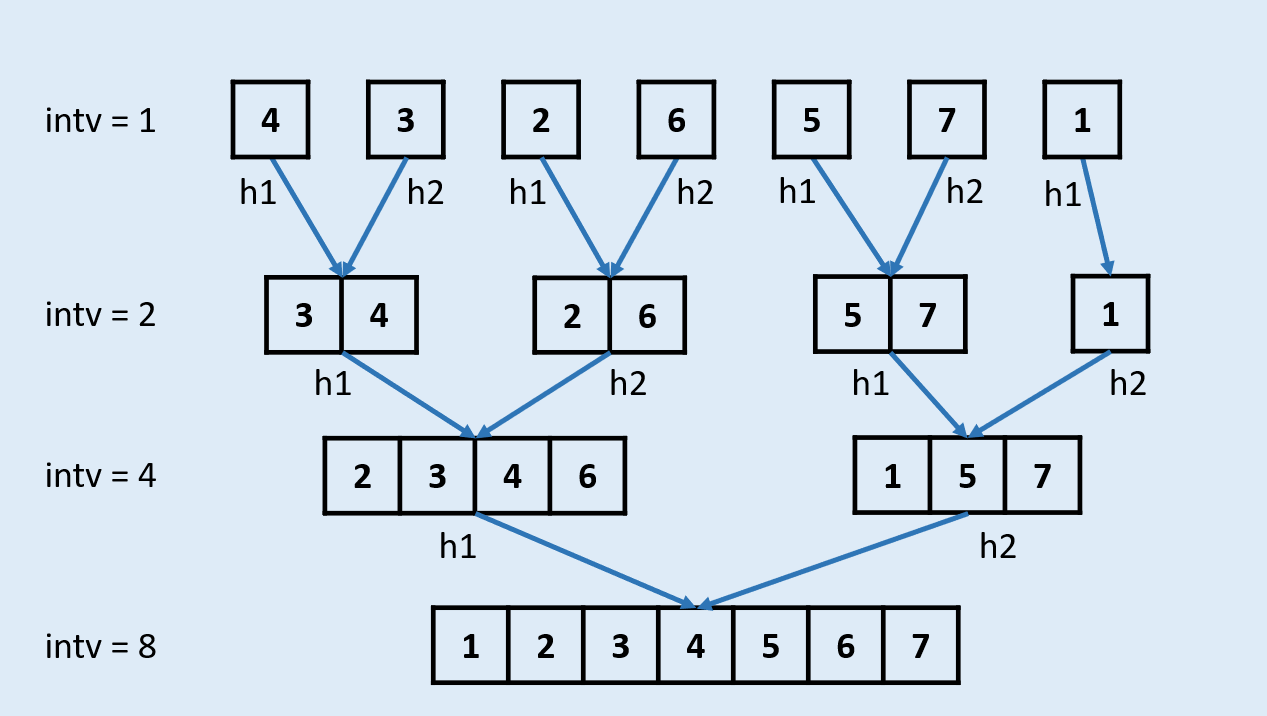

- 模拟上述的多轮排序合并：
    - 统计链表长度length，用于通过判断intv < length判定是否完成排序；
    - 额外声明一个节点res，作为头部后面接整个链表，用于：
        - intv *= 2即切换到下一轮合并时，可通过res.next找到链表头部h；
        - 执行排序合并时，需要一个辅助节点作为头部，而res则作为链表头部排序合并时的辅助头部pre；后面的合并排序可以将上次合并排序的尾部tail用做辅助节点。
    - 在每轮intv下的合并流程：
        - 1.根据intv找到合并单元1和单元2的头部h1, h2。由于链表长度可能不是2^n，需要考虑边界条件：
            - 在找h2过程中，如果链表剩余元素个数少于intv，则无需合并环节，直接break，执行下一轮合并；
            - 若h2存在，但以h2为头部的剩余元素个数少于intv，也执行合并环节，h2单元的长度为c2 = intv - i。
        - 2.合并长度为c1, c2的h1, h2链表，其中：
            - 合并完后，需要修改新的合并单元的尾部pre指针指向下一个合并单元头部h。（在寻找h1, h2环节中，h指针已经被移动到下一个单元头部）
            - 合并单元尾部同时也作为下次合并的辅助头部pre。
        - 3.当h == None，代表此轮intv合并完成，跳出。
    - 每轮合并完成后将单元长度×2，切换到下轮合并：intv *= 2。


In [ ]:
class Solution:
    def sortList(self, head: ListNode) -> ListNode:
        h, length, intv = head, 0, 1
        while h: h, length = h.next, length + 1
        res = ListNode(0)
        res.next = head
        # merge the list in different intv.
        while intv < length:
            pre, h = res, res.next
            while h:
                # get the two merge head `h1`, `h2`
                h1, i = h, intv
                while i and h: h, i = h.next, i - 1
                if i: break # no need to merge because the `h2` is None.
                h2, i = h, intv
                while i and h: h, i = h.next, i - 1
                c1, c2 = intv, intv - i # the `c2`: length of `h2` can be small than the `intv`.
                # merge the `h1` and `h2`.
                while c1 and c2:
                    if h1.val < h2.val: pre.next, h1, c1 = h1, h1.next, c1 - 1
                    else: pre.next, h2, c2 = h2, h2.next, c2 - 1
                    pre = pre.next
                pre.next = h1 if c1 else h2
                while c1 > 0 or c2 > 0: pre, c1, c2 = pre.next, c1 - 1, c2 - 1
                pre.next = h 
            intv *= 2
        return res.next


### 解题思路
先搭框架，后剖细节
最外面循环的条件是待合并的序列未达到整个序列长度  
中间循环找到待合并的两个链表
最内层循环是进行合并  

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None
###(么写出来，但是思路是对的)
class Solution:
    def sortList(self, head: ListNode) -> ListNode:
        begin_node = ListNode(0)
        begin_node.next=head
        lens_lis = 0
        h= head
        
        while h:h,lens_lis=h.next,lens_lis+1
        len_eve =1
        while(len_eve<lens_lis):
            h,i= begin_node.next, len_eve
            pre=begin_node
            h1_next =begin_node.next
            #res =ListNode(float('inf'))
            p_cur=begin_node
            while h1_next: 

                h1=h1_next
                i=2*len_eve
                while h1_next and i: 
                    h1_next,i=h1_next.next,i-1
                    pre=pre.next
                pre.next=None
                i=len_eve-1
                while h and i:
                    h=h.next
                    i=i-1
                if i==0:
                    h2=h.next
                    h.next=None
                else: h2 = h

                #if i>0:break
                while h1 and h2:
                    if h1.val<h2.val:
                        p_cur.next,h1=h1,h1.next
                    else:
                        p_cur.next,h2=h2,h2.next                        
                    p_cur.next=p_cur.next
                p_cur.next=h1 if h1 else h2
                p_pre= p_cur
                if p_cur:
                    p_cur = p_pre.next
                    while p_cur:
                        p_pre=p_pre.next
                        p_cur=p_cur.next
                    p_cur=p_pre
            len_eve*=2
        return begin_node.next

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None
#(pass)
class Solution:
    def sortList(self, head: ListNode) -> ListNode:
        lens,step = 0, 1
        if not head or not head.next: return head
        temp_p = head
        while temp_p: temp_p,lens= temp_p.next,lens+1
        beg_nod = ListNode(0)
        beg_nod.next = head
        while lens >step:
            temp_p,pre = beg_nod.next,beg_nod
            while temp_p:
                h1,len1 = temp_p,step
                while temp_p and len1:temp_p,len1 = temp_p.next,len1-1
                if len1!=0:break
                h2,len1 = temp_p,step
                while temp_p and len1:temp_p,len1 = temp_p.next,len1-1
                len2 = step-len1
                len1,p_st = step,pre
                while len1 and len2:
                    if h1.val<h2.val:p_st.next,h1,len1=h1,h1.next,len1-1
                    else: p_st.next,h2,len2 = h2,h2.next,len2-1
                    p_st=p_st.next
                p_st.next=h1 if len1 else h2
                pre=p_st
                while len2>0 or len1>0: pre,len2,len1=pre.next,len2-1 ,len1-1              
                pre.next = temp_p
            step*=2
        return beg_nod.next

## 160.相交链表
---
编写一个程序，找到两个单链表相交的起始节点。  
如下面的两个链表：

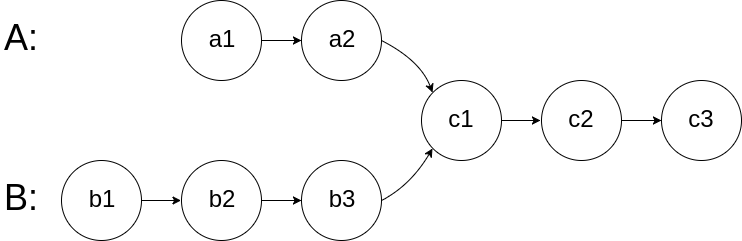
在节点c1开始相交。  

**示例1：**
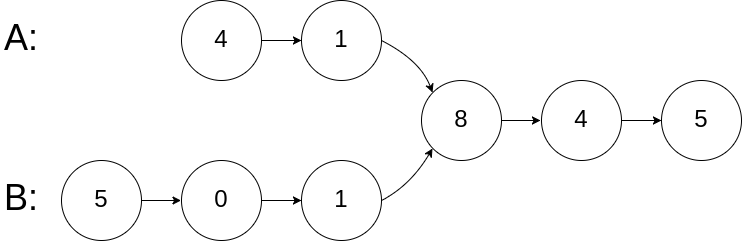

```
输入：intersectVal = 8, listA = [4,1,8,4,5], listB = [5,0,1,8,4,5], skipA = 2, skipB = 3
输出：Reference of the node with value = 8
输入解释：相交节点的值为 8 （注意，如果两个链表相交则不能为 0）。从各自的表头开始算起，链表 A 为 [4,1,8,4,5]，链表 B 为 [5,0,1,8,4,5]。在 A 中，相交节点前有 2 个节点；在 B 中，相交节点前有 3 个节点。

```

**示例 2：**
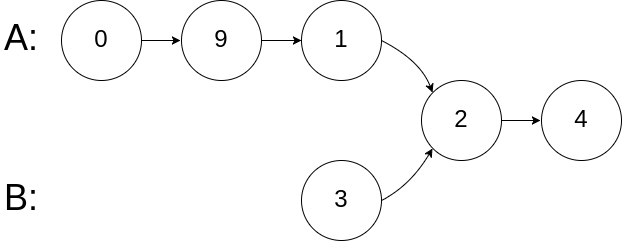
```
输入：intersectVal = 2, listA = [0,9,1,2,4], listB = [3,2,4], skipA = 3, skipB = 1
输出：Reference of the node with value = 2
输入解释：相交节点的值为 2 （注意，如果两个链表相交则不能为 0）。从各自的表头开始算起，链表 A 为 [0,9,1,2,4]，链表 B 为 [3,2,4]。在 A 中，相交节点前有 3 个节点；在 B 中，相交节点前有 1 个节点。

```

**示例3：**
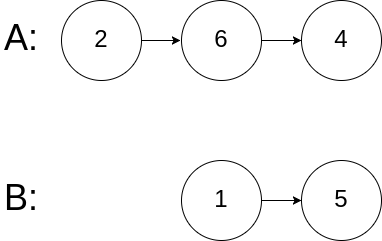
```
输入：intersectVal = 0, listA = [2,6,4], listB = [1,5], skipA = 3, skipB = 2
输出：null
输入解释：从各自的表头开始算起，链表 A 为 [2,6,4]，链表 B 为 [1,5]。由于这两个链表不相交，所以 intersectVal 必须为 0，而 skipA 和 skipB 可以是任意值。
解释：这两个链表不相交，因此返回 null。

```

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> ListNode:
        lenA =0
        lenB = 0
        p_a,p_b=headA,headB
        while p_a: p_a,lenA=p_a.next,lenA+1
        while p_b: p_b,lenB=p_b.next,lenB+1
        len_a_b,p_a,p_b = lenA-lenB,headA,headB
        if len_a_b<0:
            while len_a_b:p_b,len_a_b=p_b.next,len_a_b+1
        else:
            while len_a_b: p_a,len_a_b=p_a.next,len_a_b-1
        while p_a and p_b:
            if p_a==p_b:return p_a
            p_a,p_b=p_a.next,p_b.next           
        return None

$$ \sum yI^ilog(y^{hat}) $$

## 206.反转链表
---
反转一个链表
**示例**
```
输入: 1->2->3->4->5->NULL
输出: 5->4->3->2->1->NULL
```
**进阶:**
你可以迭代或递归地反转链表。你能否用两种方法解决这道题？

### 方法1（迭代）：

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        L=None
        while head:L,head.next,head = head,L,head.next
        return L

### 方法2(递归)：

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        if head ==None or head.next==None:
            return head
        p =self.reverseList(head.next)
        head.next.next = head
        head.next=None
        return p

## 回文链表
---
**示例1：**
```
输入: 1->2
输出: false
```

**示例2：**
```
输入: 1->2->2->1
输出: true
```
**进阶：**
你能否用 O(n) 时间复杂度和 O(1) 空间复杂度解决此题？

### 解法1:(构造辅助双端队列)

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def isPalindrome(self, head: ListNode) -> bool:
        lens = 0
        pNode = head
        queue = []
        while pNode:
            lens+=1
            queue.append(pNode.val)
            pNode = pNode.next
        while len(queue) >1:
            s0 = queue.pop(0)
            s1 = queue.pop(-1)
            if s0 != s1:
                return False
        return True

### 解法2:(构造辅助队列第二种解法)

In [70]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def isPalindrome(self, head: ListNode) -> bool:
        lens,pNode,queue,tag = 0,head,[],False
        while pNode:lens,pNode=lens+1,pNode.next
        if lens%2==1:
            tag = True
        pNode,i = head,0
        while i<lens//2:
            i+=1
            queue.append(pNode.val)
            pNode = pNode.next
        if tag == True:
            pNode = pNode.next
        while len(queue)!=0:
            w=queue.pop(-1)
            if w!=pNode.val: return False
            pNode =pNode.next
        
        return True


### 解法3：(快慢指针)

### 解法4：()

## 奇偶链表
---
给定一个单链表，把所有的奇数节点和偶数节点分别排在一起。请注意，这里的奇数节点和偶数节点指的是节点编号的奇偶性，而不是节点的值的奇偶性。

请尝试使用原地算法完成。你的算法的空间复杂度应为 O(1)，时间复杂度应为 O(nodes)，nodes 为节点总数。
**示例 1:**
```
输入: 1->2->3->4->5->NULL
输出: 1->3->5->2->4->NULL
```
**示例 2：**
```
输入: 2->1->3->5->6->4->7->NULL 
输出: 2->3->6->7->1->5->4->NULL
```
**说明：**
- 应当保持奇数节点和偶数节点的相对顺序。
- 链表的第一个节点视为奇数节点，第二个节点视为偶数节点，以此类推。

### 解法（辅助头节点，插入）

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def oddEvenList(self, head: ListNode) -> ListNode:
        head_tp = ListNode(0)
        p_tp = head_tp
        pre = head
        if pre == None or pre.next==None:
            return head
        next_,pre_pre = head.next,pre
        while pre and next_:
            p_tp.next= next_
            p_tp =p_tp.next
            pre.next,pre_pre= next_.next,pre
            pre = pre.next
            if pre:
                next_.next=pre.next
                next_ =pre.next
        if next_: next_.next =None
        if pre:pre.next =head_tp.next
        else:pre_pre.next =head_tp.next
        return head